In [ ]:
!pip install geemap
!pip install geopandas

import ee, geemap, pprint, folium
ee.Authenticate()

def build_map(lat, lon, zoom, vizParams, image, name):
    map = geemap.Map(center = [lat, lon], zoom = zoom)
    map.addLayer(image, vizParams, name)
    return map

def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
      tiles=map_id_dict['tile_fetcher'].url_format,
      attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
      name=name,
      overlay=True,
      control=True
  ).add_to(self)

# Initialize the Earth Engine module.
ee.Initialize()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=f9hxev8UvaQFNJJaRLZR2TNhjpGX9h-FXbVW6kVJhLo&tc=gPxcILF1LzSYjkAOuGRRapm0-f17MRPzU6ft6UgRlSM&cc=foEsu1xEcuxDXeH8yHGTCgTo7-eFf9lISBgQFxnma7M

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWiiG96CHiog1ZPwHOFNB2i7RUFI-d9hEROZYdjkj6Jd8DBToxR9G1w

Successfully saved authorization token.


Exercise 1: Use the geopandas method above to get the boundary of a country of your study area , convert it to earth engine feature and plot it. 

In [ ]:
import geopandas as gpd
# Available datasets in geopandas
print(gpd.datasets.available)
# Country boundaries within geopandas 
world_filepath = gpd.datasets.get_path('naturalearth_lowres')

['naturalearth_cities', 'naturalearth_lowres', 'nybb']


In [ ]:
world = gpd.read_file(world_filepath)
world.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [ ]:
# Filter it down 
df_asia = world.loc[world.continent == 'Asia']
df_asia.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1291358,Asia,Timor-Leste,TLS,4975.00,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,8299706,Asia,Israel,ISR,297000.00,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6229794,Asia,Lebanon,LBN,85160.00,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,10248069,Asia,Jordan,JOR,86190.00,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,6072475,Asia,United Arab Emirates,ARE,667200.00,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,2314307,Asia,Qatar,QAT,334500.00,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."


In [ ]:
bangladesh = df_asia.loc[df_asia.name == 'Bangladesh']
bangladesh.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
99,157826578,Asia,Bangladesh,BGD,628400.0,"POLYGON ((92.67272 22.04124, 92.65226 21.32405..."


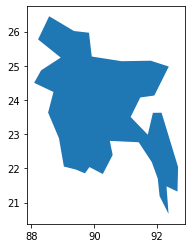

In [ ]:
bangladesh.plot()

In [ ]:
# Create a GEE Feature
gee_feature = geemap.geopandas_to_ee(bangladesh)

In [ ]:
Map = geemap.Map()
Map.addLayer(gee_feature, {}, "geopandas to ee example")
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

Exercise 2
1. Use print(gpd.datasets.available) to see the other datasets available.
2. Read in one of the datasets and look at the dataframe
3. Filter the dataset down to a manageable size
4. Convert to a GEE feature
5. Plot it

In [ ]:
import geopandas as gpd
# Available datasets in geopandas
print(gpd.datasets.available)
# NY Borough boundaries within geopandas 
nyb_filepath = gpd.datasets.get_path('nybb')

['naturalearth_cities', 'naturalearth_lowres', 'nybb']


In [ ]:
nyb = gpd.read_file(nyb_filepath)
nyb.head(10)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [ ]:
# Filter it down 
df_nyb = nyb.loc[nyb.BoroName == 'Manhattan']
df_nyb.head(10)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."


In [ ]:
manhattan = df_nyb.loc[df_nyb.BoroName == 'Manhattan']
manhattan.head(10)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."


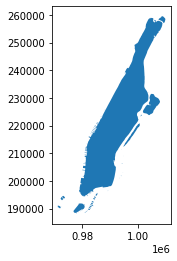

In [ ]:
manhattan.plot()

In [ ]:
# Create a GEE Feature
gee_feature = geemap.geopandas_to_ee(manhattan)

In [ ]:
Map = geemap.Map()
Map.addLayer(gee_feature, {}, "geopandas to ee example")
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
# 4. Include the relative path name to the shapefile
df = './nga_admbnda_adm2_osgof_20170222.shp'
# 5. Convert the shapefile to a GEE feature
gee_vector = geemap.shp_to_ee(df)

The input shapefile could not be found.


In [ ]:
Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
## add your shapefile for Nigeria
Nigeria_shp = ee.FeatureCollection('projects/ee-naveenabedin/assets/ngaadmbndaadm2osgof') #Get this directory from the GEE code editor -> Assets tab -> upload the shape file and copy the id after import
Map.centerObject(Nigeria_shp, 5)
Map.addLayer(Nigeria_shp, {}, 'Nigeria Dist')